# Download dataset

In [ ]:
import pandas as pd

# df = pd.read_parquet('https://huggingface.co/api/datasets/juletxara/xquad_xtreme/parquet/vi/translate_train/0.parquet')
df = pd.read_csv('https://raw.githubusercontent.com/Tohoangminhtien/Assets/master/data.csv')

In [ ]:
df

,question,context,answer_start,answer
0,Đội thủ Panthers đã thua bao nhiêu điểm?,"Đội thủ của Panthers chỉ thua 308 điểm, đứng t...",30,308
1,Ai thua đội Broncos ở vòng bảng?,Broncos đã đánh bại Pittsburgh Steelers ở vòng...,20,Pittsburgh Steelers
2,Peyton Manning bao nhiêu tuổi khi anh chơi tro...,Peyton Manning trở thành thủ quân (quaterback)...,196,39
3,Lady Gaga đã giành được bao nhiêu giải Grammy?,Người chiến thắng giải Grammy sáu lần và người...,30,sáu
4,Carolina đã bắt đầu ở vạch nào khi trận đấu cò...,"Khi thời gian quy định còn lại 4:51, Carolina ...",61,24
...,...,...,...,...
5224,vua nào cho phát hành tiền giấy đầu tiên ở việ...,Tiền giấy xuất hiện . Năm 1396 thời Trần Thuận...,54,Hồ Quý Ly
5225,Ai là người phát minh ra máy quay phim,Máy quay phim: Phát minh kỳ diệu của anh em Lu...,37,anh em Lumière Phương Hiền
5226,tên quận nào ở đà nẵng cũng là tên một danh th...,Ngũ Hành Sơn hay núi Non Nước là một danh thắn...,285,quận Ngũ Hành Sơn
5227,trận đánh nào có ý nghĩa quyết định trong khán...,Trận Như Nguyệt là một trận đánh lớn diễn ra ở...,0,Trận Như Nguyệt


## Review serveral sample

In [ ]:
ids=101

In [ ]:
df['context'][ids]

'Nghiên cứu cũng cho thấy có hai nhánh (nhánh di truyền) trước đây chưa được biết đến nhưng có liên quan của bộ gen Y. pestis liên quan đến các ngôi mộ tập thể thời trung cổ. Những nhánh này (được cho là đã tuyệt chủng) được phát hiện là tổ tiên của các chủng phân lập hiện đại của các chủng Y. pestis hiện đại là Y. p. orientalis và Y. p. medievalis, cho thấy bệnh dịch hạch có thể đã xâm nhập vào châu Âu trong hai đợt. Các khảo sát về hố dịch hạch vẫn còn ở Pháp và Anh cho thấy biến thể đầu tiên vào châu Âu thông qua cảng Marseille vào khoảng tháng 11 năm 1347 và lan qua Pháp trong hai năm tiếp theo, cuối cùng đến Anh vào mùa xuân năm 1349, nơi bệnh dịch hạch đã lan khắp nước này bằng 3 đợt bộc phát. Các cuộc khảo sát về hố dịch hạch vẫn còn từ thị trấn Bergen op Zoom của Hà Lan cho thấy bộ gen Y. pestis chịu trách nhiệm về đại dịch lan truyền qua các Quốc gia Thấp từ năm 1350 khác với ở Anh và Pháp, ngụ ý là Bergen op Zoom (và có thể các phần khác của miền nam Hà Lan) không bị lây nhiễ

In [ ]:
df['question'][ids]

'Các nhánh là gì?'

In [ ]:
df['answer'][ids]

'nhánh di truyền'

In [ ]:
train_contexts = df['context'].to_list()
train_questions = df['question'].to_list()
train_answers = df['answer'].to_list()

# Visualization

In [ ]:
import seaborn as sns

context_len = [len(i.split(' ')) for i in train_contexts]
question_len = [len(i.split(' ')) for i in train_questions]
answer_len = [len(i.split(' ')) for i in train_answers]

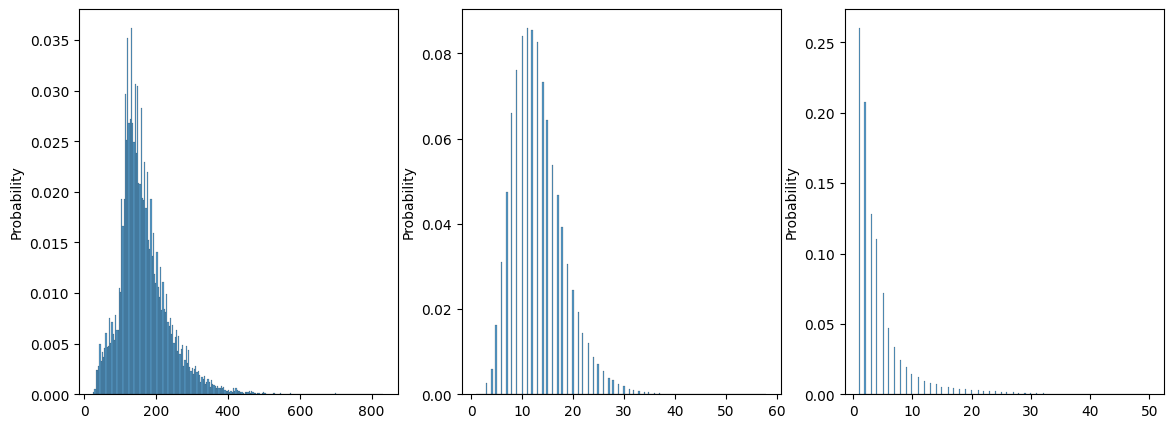

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.histplot(x = context_len, stat='probability', ax =axes[0])
sns.histplot(x = question_len, stat='probability', ax =axes[1])
sns.histplot(x = answer_len, stat='probability', ax =axes[2])
plt.show()

In [ ]:
!pip install -q wordcloud

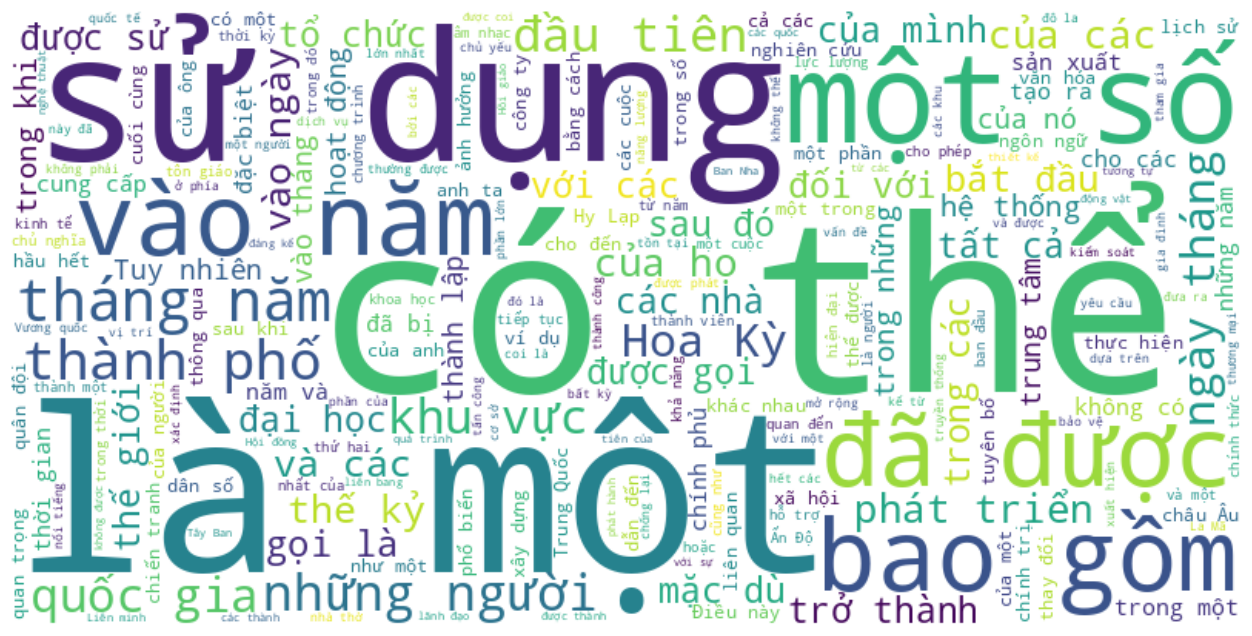

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(' '.join(train_contexts))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Tokenizer

In [ ]:
PRETRAINED_NAME = 'vinai/phobert-base'
MAXTOKEN = 384

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [ ]:
def TokenizerQuestionAnswer(context, question, answer, max_length):
  assert len(context) == len(question) == len(answer)
  input_ids, attention_mask, answer_ids = [], [], []

  for i in range(len(context)):
    # Tokenizer  <s> question </s> </s> context </s>

    # ids =  tokenizer.encode(context[i], question[i], truncation=True, max_length=max_length)
    # ids =  tokenizer.encode(question[i], context[i])
    ids =  tokenizer.encode(context[i], question[i])
    answer_id = tokenizer.encode(answer[i], add_special_tokens=False)

    mask = [1] * len(ids)
    # Padding cho đủ 256 token nếu thừa thì skip ngược lại padding
    num_pad = max_length - len(ids)
    if num_pad < 0:
      continue

    # PhoBert có padding là 1 khác với Bert 0
    ids+= [1] * num_pad
    # Attention mask padding luôn là 0
    mask+= [0] * num_pad

    input_ids.append(ids)
    attention_mask.append(mask)
    answer_ids.append(answer_id)
  return input_ids, attention_mask, answer_ids

In [ ]:
train_ids, train_mask, train_answer_ids = TokenizerQuestionAnswer(train_contexts, train_questions, train_answers, max_length = MAXTOKEN)

Token indices sequence length is longer than the specified maximum sequence length for this model (408 > 256). Running this sequence through the model will result in indexing errors


In [ ]:
# Kiểm tra giá trị decode
tokenizer.decode(train_ids[2000])

'<s> Cleopatra IV là Nữ vương Ai cập một thời gian ngắn từ 116 đến 115 TCN, cùng cai trị với chồng, Ptolemaios IX Lathyros. </s> </s> Từ năm 116 đến 115 TCN, Nữ vương Ai cập là ai </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

In [ ]:
tokenizer.decode(train_answer_ids[2000])

'Cleopatra IV'

# Create labels set

In [ ]:
def FindStartEnd(list_longer, list_shorter):
  ll = len(list_longer)
  ls = len(list_shorter)
  num_duplicate = 0
  for i in range(ll - ls + 1):
    if list_longer[i: i+ ls] == list_shorter:
      num_duplicate += 1
      start = i
      end = i + ls -1
  if num_duplicate == 1:
    return start, end
  else:
    return -1, -1

def CreateLabels(input_ids, attention_mask, answer_ids):
  assert len(input_ids) == len(attention_mask) == len(answer_ids)

  x_ids, x_attention_mask, y_start, y_end = [], [], [], []
  for i in range(len(input_ids)):
    s, e = FindStartEnd(input_ids[i], answer_ids[i])
    if s != -1:
      x_ids.append(input_ids[i])
      x_attention_mask.append(attention_mask[i])
      y_start.append(s)
      y_end.append(e)
  return x_ids, x_attention_mask, y_start, y_end

In [ ]:
x_ids, x_attention_mask, y_start, y_end = CreateLabels(train_ids, train_mask, train_answer_ids)

In [ ]:
idx = 0
print(f"input ids of sample {idx}: {x_ids[idx]}")
print(f"attention mask of sample {idx}: {x_attention_mask[idx]}")
print(f"start position of sample {idx}: {y_start[idx]}")
print(f"end position of sample {idx}: {y_end[idx]}")

input ids of sample 0: [0, 28117, 17953, 14, 480, 6416, 42140, 6703, 2534, 4930, 25, 323, 614, 15, 192, 100, 13412, 2873, 4, 121, 139, 701, 624, 192, 12, 346, 436, 352, 81, 7, 196, 27979, 28463, 162, 27772, 4, 86, 480, 6416, 24253, 3599, 4819, 4443, 38247, 24590, 2228, 1646, 12138, 2320, 22514, 45284, 44830, 1672, 5091, 12, 7796, 19954, 10822, 15, 192, 100, 8824, 3855, 4, 121, 139, 2146, 301, 39, 109, 4201, 12, 1301, 16006, 2792, 430, 1361, 76, 192, 7, 22514, 45284, 15, 1120, 2351, 50, 44, 34, 80, 17064, 5, 46149, 13557, 21, 12053, 1294, 7, 50704, 15, 49, 2146, 301, 12, 303, 17554, 1384, 4, 83, 14, 17, 2014, 301, 12, 82, 196, 349, 25465, 17873, 7, 26427, 5, 2, 2, 2679, 1156, 226, 28117, 17953, 25, 323, 16072, 1701, 114, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print(f"context and question: {tokenizer.decode(x_ids[idx])}")

context and question: <s> Broncos đã đánh bại Pittsburgh Steelers ở vòng bảng với điểm số 23-16, bằng cách ghi 11 điểm trong ba phút cuối cùng của trận đấu. Sau đó, họ đánh bại đương kim vô địch Super Bowl XLIX New England Patriots trong AFC Championship Game với điểm số 20-18, bằng cách đoạt bóng từ đường chuyền trong nỗ lực chuyển đổi 2 điểm của New England với 17 giây còn lại trên đồng hồ. Bất chấp những vấn đề của Manning với việc đoạt bóng trong mùa giải, anh đã không ném bóng trong hai trận đấu playoff của họ. </s> </s> Ai thua đội Broncos ở vòng bảng? </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

In [ ]:
print(f"context and question: {tokenizer.decode(x_ids[idx][y_start[idx]: y_end[idx] + 1])}")

context and question: Pittsburgh Steelers


# TF Dataset

In [ ]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((x_ids, x_attention_mask, y_start, y_end))

In [ ]:
def format(x_ids, x_attention_mask, y_start, y_end):
  return (
      {'input_ids': x_ids,
       'attention_mask': x_attention_mask
       },{
          'start_positions': y_start,
          'end_positions': y_end
      }
  )

In [ ]:
ds = dataset.map(format).batch(8)

num = len(ds)
num_train = int(num * 0.8)
train_ds = ds.take(num_train).shuffle(buffer_size=512)
val_ds = ds.skip(num_train)

In [ ]:
for i,j  in val_ds.take(1):
  # print(tokenizer.decode(i['input_ids'][0]))
  print(i['input_ids'][0])
  print(i['attention_mask'])
  print(j['start_positions'])
  print(j['end_positions'])

tf.Tensor(
[    0    92   110  1083  2370   698  1981  2308    93  1531     4    94
    82  5452  2370  1430     7   621  2446   286   131    10  2528  1710
    39 14163     5  5144 12813  9031 16109  5940   418    35 14163    51
  1164  2370    15  1713   139  7899 12813  9031  1400 22514 31352     5
   631  5452  2370  1430  3627 12194  2436   418    35 49456     4  9577
  1164  2370    15  1713   139  7899 12813  9031  1400 14163     5     2
     2 16470  2263     7   698  1981  2308  2436    25   602     2     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1    

# Model

In [ ]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained(PRETRAINED_NAME)
config.hidden_dropout_prob = 0
config.attention_probs_dropout_prob = 0

In [ ]:
from transformers import TFRobertaForQuestionAnswering
from keras.layers import Input, Activation, Softmax
from keras.models import Model
from keras.activations import softmax
import tensorflow as tf

ids = Input(shape=(MAXTOKEN,), dtype=tf.int32, name = 'input_ids')
mask = Input(shape=(MAXTOKEN,), dtype=tf.int32, name = 'attention_mask')

bert = TFRobertaForQuestionAnswering.from_pretrained(PRETRAINED_NAME, config=config)
bert.trainable = True

start = bert(ids, attention_mask = mask).start_logits
end = bert(ids, attention_mask = mask).end_logits

start_logit = Activation(softmax, name='start_positions')(start)
end_logit = Activation(softmax, name='end_positions')(end)

model = Model([ids, mask], [start_logit, end_logit])

tf_model.h5:   0%|          | 0.00/740M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForQuestionAnswering.

Some layers of TFRobertaForQuestionAnswering were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['qa_outputs']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


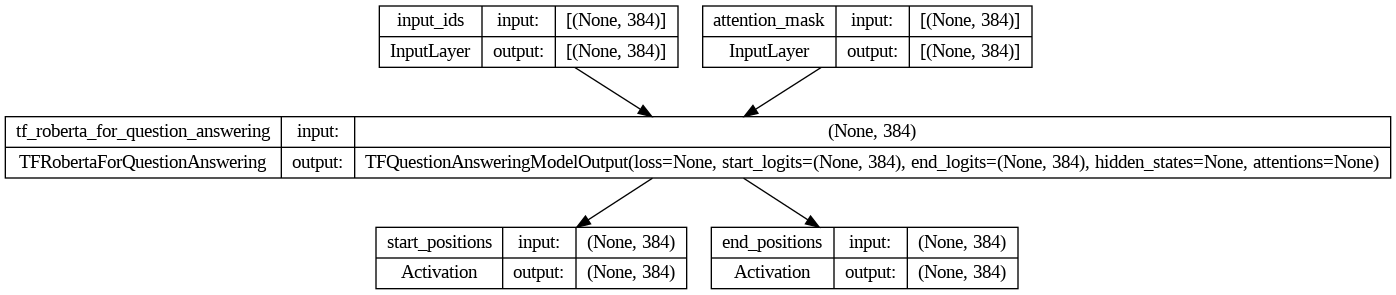

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes = True)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 384)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 384)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_roberta_for_question_an  TFQuestionAnsweringModelOu   1344092   ['input_ids[0][0]',           
 swering (TFRobertaForQuest  tput(loss=None, start_logi   18         'attention_mask[0][0]',      
 ionAnswering)               ts=(None, 384),                         'input_ids[0][0]',       

# Training

In [ ]:
import datetime
from keras.callbacks import TensorBoard

# Tạo tensorboard để lưu log khi train
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir)

In [ ]:
import numpy as np
import keras

class ExactMatch(keras.callbacks.Callback):
    def __init__(self, val_dataset):
        self.val_dataset = val_dataset

    def on_epoch_end(self, epoch, logs=None):
      start_pred, end_pred = self.model.predict(self.val_dataset)
      true_count, total = 0, 0
      for idx, (i, j) in enumerate(self.val_dataset.unbatch()):
        total +=1
        if j['start_positions'] == np.argmax(start_pred[idx]) and j['end_positions'] == np.argmax(end_pred[idx]):
          true_count +=1
      acc = true_count / total
      print(f"\nEpoch={epoch+1}, Exact match score={acc:.2f}\n")

class CheckPoints(keras.callbacks.Callback):
    def __init__(self):
        pass

    def on_epoch_end(self, epoch, logs=None):
      self.model.save_weights(f'ModelCheckPointEpoch{epoch+1}.h5')
      print(f'save check point on epoch {epoch+1}')

In [ ]:
exact_match_callback = ExactMatch(val_ds)
checkpoint_callback = CheckPoints()

In [ ]:
# Hyperparameters
EPOCH = 4
LR= 2e-5

In [ ]:
# Thêm các thuật toán tối ưu
optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=[loss, loss])

In [ ]:
result = model.fit(train_ds, epochs=EPOCH, validation_data=val_ds, callbacks=[tensorboard_callback, checkpoint_callback, exact_match_callback])

Epoch 1/4
101/101 [==============================] - 52s 454ms/step

Epoch=1, Exact match score=0.70

402/402 [==============================] - 698s 2s/step - loss: 2.9866 - start_positions_loss: 1.6609 - end_positions_loss: 1.3257 - val_loss: 1.4518 - val_start_positions_loss: 0.8816 - val_end_positions_loss: 0.5702
Epoch 2/4
101/101 [==============================] - 46s 453ms/step

Epoch=2, Exact match score=0.74

402/402 [==============================] - 617s 2s/step - loss: 0.8660 - start_positions_loss: 0.5076 - end_positions_loss: 0.3584 - val_loss: 1.2766 - val_start_positions_loss: 0.7946 - val_end_positions_loss: 0.4819
Epoch 3/4
101/101 [==============================] - 46s 451ms/step

Epoch=3, Exact match score=0.75

402/402 [==============================] - 615s 2s/step - loss: 0.3268 - start_positions_loss: 0.2004 - end_positions_loss: 0.1264 - val_loss: 1.5836 - val_start_positions_loss: 0.9017 - val_end_positions_loss: 0.6819
Epoch 4/4
101/101 [=====================

# Visualize result training

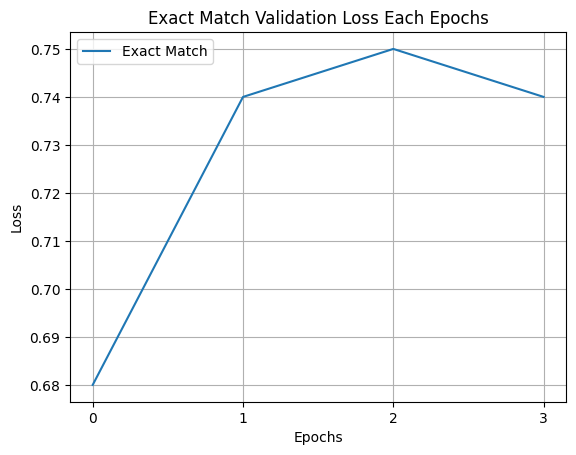

In [ ]:
import matplotlib.pyplot as plt

a = [0.68, 0.74, 0.75, 0.74]

plt.plot(a, label='Exact Match')

# Customize the plot
plt.title('Exact Match Validation Loss Each Epochs')
plt.xticks([0, 1, 2, 3])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

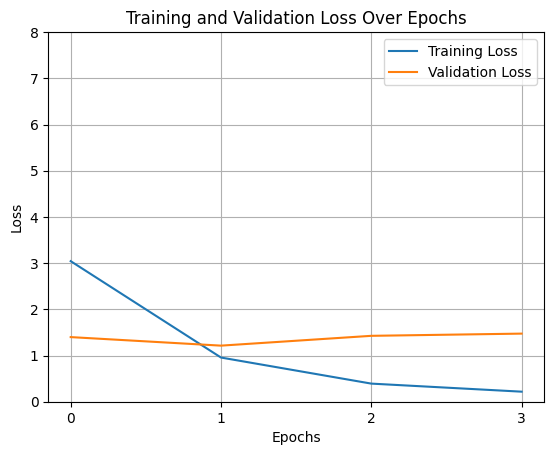

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(result.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(result.history['val_loss'], label='Validation Loss')

# Customize the plot
plt.title('Training and Validation Loss Over Epochs')
plt.ylim(0, 8)
plt.xticks([0, 1, 2, 3])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

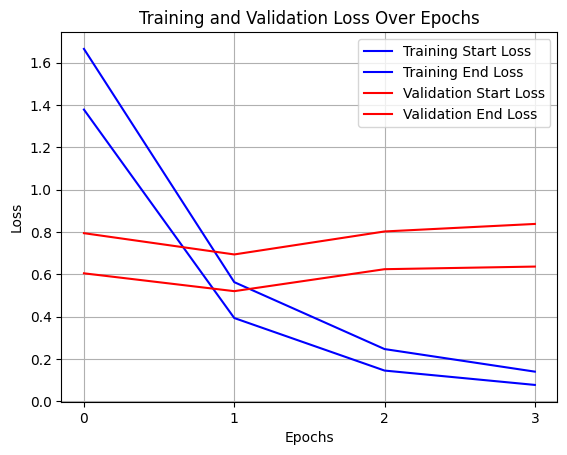

In [ ]:
import matplotlib.pyplot as plt


# Plot training loss
plt.plot(result.history['start_positions_loss'], label='Training Start Loss', color='blue')
plt.plot(result.history['end_positions_loss'], label='Training End Loss', color='blue')

# Plot validation loss
plt.plot(result.history['val_start_positions_loss'], label='Validation Start Loss', color='red')
plt.plot(result.history['val_end_positions_loss'], label='Validation End Loss', color='red')

# Customize the plot
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks([0, 1, 2, 3])
# plt.ylim(3, 4)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs/fit

# Evaluate

In [ ]:
model.load_weights('/content/drive/MyDrive/KLTN/CheckPoint/ModelCheckPointEpoch2.h5')

In [ ]:
bert.save_pretrained('/content/drive/MyDrive/KLTN/PreTrained')

In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/KLTN/PreTrained')

('/content/drive/MyDrive/KLTN/PreTrained/tokenizer_config.json',
 '/content/drive/MyDrive/KLTN/PreTrained/special_tokens_map.json',
 '/content/drive/MyDrive/KLTN/PreTrained/tokenizer.json')

In [ ]:
import numpy as np

def EvaluateExactMatch(val_dataset, model):
  # start_pred: 160, 256
  # end_pred: 160, 256
  # j['start_positions']: 160,
  start_pred, end_pred = model.predict(val_dataset)

  true_count, total = 0, 0
  for idx, (i, j) in enumerate(val_dataset.unbatch()):
    total +=1
    if j['start_positions'] == np.argmax(start_pred[idx]) and j['end_positions'] == np.argmax(end_pred[idx]):
      true_count +=1
  return true_count / total

In [ ]:
EvaluateExactMatch(val_ds, model)

56/56 [==============================] - 632s 11s/step


0.7417893544733862

In [ ]:
def calculate_f1_score(predicted_answer, true_answer):
    # Chuyển đổi các câu trả lời thành tập hợp các từ
    predicted_set = set(predicted_answer.lower().split())
    true_set = set(true_answer.lower().split())

    # Tính precision và recall
    precision = len(predicted_set.intersection(true_set)) / len(predicted_set) if len(predicted_set) > 0 else 0
    recall = len(predicted_set.intersection(true_set)) / len(true_set) if len(true_set) > 0 else 0

    # Tính F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return f1_score

def EvaluateF1(val_dataset, model):
  start_pred, end_pred = model.predict(val_ds)

  iou_sum, total = 0, 0
  for idx, (i, j) in enumerate(val_ds.unbatch()):
    total+=1
    # Get index
    s_ = np.argmax(start_pred[idx])
    e_ = np.argmax(end_pred[idx])
    s = j['start_positions']
    e = j['end_positions']
    # Get list token
    y_pred = i['input_ids'][s_:e_+1]
    y_true = i['input_ids'][s:e+1]
    text_pred = tokenizer.decode(y_pred)
    text_true = tokenizer.decode(y_true)
    # Cal iou
    iou_sum+= calculate_f1_score(text_pred, text_true)
  return iou_sum/total

In [ ]:
EvaluateF1(val_ds, model)

 16/101 [===>..........................] - ETA: 38s

# Inference

In [ ]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained('Tien-THM/QAVi')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
config

XLMRobertaConfig {
  "_name_or_path": "Tien-THM/QAVi",
  "architectures": [
    "RobertaForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [ ]:
# Load model directly
from transformers import AutoTokenizer, TFAutoModelForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("Tien-THM/QAVi")
model = TFAutoModelForQuestionAnswering.from_pretrained("Tien-THM/QAVi", config = config)



All model checkpoint layers were used when initializing TFXLMRobertaForQuestionAnswering.

All the layers of TFXLMRobertaForQuestionAnswering were initialized from the model checkpoint at Tien-THM/QAVi.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForQuestionAnswering for predictions without further training.


In [ ]:
import numpy as np

def Inference(context, question):
  encoding = tokenizer(context, question, return_tensors='tf')
  start_pos = model(encoding).start_logits
  end_pos = model(encoding).end_logits
  s = np.argmax(start_pos[0])
  e = np.argmax(end_pos[0])
  print(tokenizer.decode(encoding['input_ids'][0][s:e+1]))

In [ ]:
model.summary()

Model: "tfxlm_roberta_for_question_answering"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFXLMRobertaMainL  multiple                  277453056 
 ayer)                                                           
                                                                 
 qa_outputs (Dense)          multiple                  1538      
                                                                 
Total params: 277454594 (1.03 GB)
Trainable params: 277454594 (1.03 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
context_1 = """
Elon Reeve Musk FRS (sinh ngày 28 tháng 6 năm 1971), là một kỹ sư, nhà tài phiệt,
nhà phát minh, doanh nhân công nghệ và nhà từ thiện người Mỹ gốc Nam Phi.
"""
question_1 = 'Elon Musk là người nước nào?'
question_2 = 'Elon Musk sinh ngày bao nhiêu?'

Inference(context_1, question_1)
Inference(context_1, question_2)

người Mỹ gốc Nam Phi
ngày 28 tháng 6 năm 1971


In [ ]:
context_2 = """
Elon Musk cùng với em trai, Kimbal, đồng sáng lập ra Zip2,
một công ty phần mềm web và được hãng Compaq mua lại với giá 340 triệu USD vào năm 1999.
"""

question_3 = 'Elon có em trai?'
question_4 = 'Hãng Compaq mua lại Zip2 với giá bao nhiêu?'

Inference(context_2, question_3)
Inference(context_2, question_4)

Kimbal
340 triệu USD


In [ ]:
context_3 = """John vừa mới trở về từ chuyến công tác ở Paris. Anh ấy đã tham gia một hội thảo quốc tế về nghệ thuật số.
Trong hội thảo, John đã gặp nhiều nghệ sĩ và chia sẻ kinh nghiệm của mình trong việc sáng tạo nghệ thuật số
"""

question_5 = 'John đã tham gia sự kiện gì ở Paris?'
question_6 = 'John đã gặp được ai?'

In [ ]:
Inference(context_3, question_5)
Inference(context_3, question_6)

hội thảo quốc tế
nhiều nghệ sĩ


In [ ]:
context_4 = '''Sara, một nhà nghiên cứu sinh hóa học, đã bắt đầu dự án nghiên cứu của mình với mục tiêu là khám phá tác động của vi khuẩn đối với cây trồng trong môi trường nước ô nhiễm. Để làm điều này, cô đã thiết kế một kế hoạch thu thập mẫu đất và nước từ các khu vực nông thôn và đô thị khác nhau. Sau đó, cô đã áp dụng các phương pháp phân tích sinh học phức tạp để đánh giá sự đa dạng của vi khuẩn và xác định cách chúng có thể ảnh hưởng đến sức khỏe và phát triển của cây trồng. Qua quá trình nghiên cứu, Sara cũng đã kết hợp dữ liệu địa lý để hiểu rõ hơn về mối quan hệ giữa môi trường và sự phát triển của vi khuẩn'''

question_9 = 'Sara đã thực hiện những bước nào trong dự án nghiên cứu của mình để đảm bảo tính toàn vẹn và sự đa dạng của dữ liệu thu thập được?'

Inference(context_4, question_9)

nước ô nhiễm
